In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psutil
from IPython.core.display import display, HTML
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

# Getting started

Below you can see a basic data loader from the sample data file. Copy this notebook and start analyzing! Not sure where to start with Jupyter and Pandas? Ben Welsh's [First Python Notebook](http://www.firstpythonnotebook.org/) is a great introduction.

In [5]:
df = pd.read_csv('data/hacknight_ticket_sample_data_2015.csv', low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
ticket_number            50000 non-null int64
issue_date               50000 non-null datetime64[ns]
violation_location       50000 non-null object
license_plate_number     50000 non-null object
license_plate_state      49998 non-null object
license_plate_type       49383 non-null object
zipcode                  41550 non-null object
violation_code           50000 non-null object
violation_description    50000 non-null object
unit                     50000 non-null int64
unit_description         50000 non-null object
vehicle_make             50000 non-null object
fine_level1_amount       50000 non-null int64
fine_level2_amount       50000 non-null int64
current_amount_due       50000 non-null float64
total_payments           50000 non-null float64
ticket_queue             50000 non-null object
ticket_queue_date        50000 non-null datetime64[ns]
notice_level             36707 

In [7]:
df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il"
1,65543631,2015-01-10 17:09:00,423 N LARAMIE,13d93046fb2c3bc2d79baa8647d620d0c5a65fdc223cb9...,IL,PAS,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,15,CPD,CHRY,60,120,146.4,0.0,Notice,2015-01-28,SEIZ,NaN,5109291290,16391,"400 n laramie, chicago, il"
2,9188975267,2015-06-11 18:49:00,1338 W CORNELIA,265ee87ad9d24c7732f65383e6b9af1f344348bf639ce2...,IL,PAS,606134985,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,502,DOF,BMW,60,120,0.0,60.0,Paid,2015-06-23,VIOL,NaN,5190301770,1444,"1300 w cornelia, chicago, il"
3,64465302,2015-01-14 08:09:00,229 W CERMAK RD,2800f6eaba1dc6fde0b0785df17c808dba871d1570cc4c...,IL,PAS,605442187,0964130A,PARK ALLEY,495,Miscellaneous,HOND,150,300,0.0,150.0,Paid,2015-04-28,DETR,NaN,5191229940,313,"200 w cermak rd, chicago, il"
4,9189537354,2015-10-28 16:26:00,2410 N MONTICELLO AV,f0858c838c8cabda4e8fd3e0425a6c330a76e006f9de01...,IL,PAS,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,TOYT,50,100,0.0,100.0,Paid,2016-01-27,SEIZ,NaN,5168404170,1407,"2400 n monticello av, chicago, il"


In [12]:
df['license_plate_number'].value_counts()

603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb4cc5d7a8ec73f9e04d    1383
efa2070472920671da66b36d3d20dd2d43ff71d3abdc7b58c296cb352e46f5d2      17
6e10183be3982ddaa3551f36ce7b95286a4746a38c817b542f7e91501426d088      13
e2be47e37ed1fb0329320e5169cad12ec861b2b948aa4947d8ecefa46b74e1a8       9
f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb8a9509b8a688dd64f4       6
60be3f009de0952cad387710cd00a69a14fa1e00255e9af75f51f8bcac0804ac       5
00a30ca6f11be2e3d10abb3a9d16953f05069ba431c296f53dd1ff416a6a333e       5
87bb3b8e3851e5f2cd5bb3a88b24db1927b2d61eea77adf8e754d895476ecfb8       5
4e9c8b41accba6fa01c0720864183b632f139986c326517bc86a81f8df1ec3e3       5
76940eab16c80545082bd3fc8aefe5c5f83a786a109ef879d4c7d4f7d75cc728       4
73883d3440f8a09f03c57eca113bc9e3765972994e4b0dc7a46bf63c1b9eff18       4
380a28b7dbc47c75cf9b20107168afa4893023f77b9cbfd12b24c25514466964       4
3bf2c39336305834f4406586f57525c252ea1e42050ae9f9db1e75f2093fd02c       4
a471dae05aa66ef0cce0881af710108f5ad73549efc282655cb

In [8]:
df['vehicle_make'].unique()

array(['BUIC', 'CHRY', 'BMW', 'HOND', 'TOYT', 'CHEV', 'HYUN', 'DODG',
       'OLDS', 'NISS', 'FORD', 'VOLK', 'MERZ', 'SUBA', 'PONT', 'MAZD',
       'SAAB', 'JEEP', 'UNKN', 'AUDI', 'ACUR', 'LEXU', 'MITS', 'MERC',
       'GMC', 'CADI', 'INFI', 'SCIO', 'SATR', 'PORS', 'INTL', 'HARL',
       'KIA', 'RROV', 'LINC', 'VOLV', 'GENU', 'SUZI', 'HINO', 'WSTR',
       'JAGU', 'SMRT', 'KENW', 'ISU', 'MINI', 'WORH', 'LNDR', 'FLNR',
       'OTHR', 'TRIU', 'IND', 'PLYM', 'HUMM', 'SPNT', 'KAWA', 'EGIL',
       'ROV', 'PETR', 'GELY', 'YAMA', 'APRL', 'THMP', 'FIAT', 'FERR',
       'SCHW', 'HUDS', 'MASE', 'GEO', 'TESL', 'DAEW', 'ASTO', 'TRAL',
       'STRG', 'BENT', 'VESP', 'PIAG', 'MACK', 'MERK', 'LCE', 'DUCA',
       'PTRB', 'SYM', 'VPGP', 'KYMC', 'CAP', 'LNCI', 'CHEC', 'ROL',
       'DATS', 'MOGU', 'POLS', 'TAOT', 'BENE', 'MCIN', 'JONW', 'MG',
       'ZHEJ', 'FTWD', 'BUEL'], dtype=object)

In [9]:
df['vehicle_make'].value_counts()

CHEV    6612
FORD    5389
TOYT    4891
HOND    3894
NISS    3458
DODG    2422
JEEP    1927
PONT    1653
HYUN    1644
VOLK    1457
CHRY    1418
BUIC    1313
BMW     1113
LEXU     950
GMC      940
MERZ     936
MAZD     831
KIA      789
ACUR     772
CADI     707
AUDI     678
MERC     630
INFI     623
SUBA     573
MITS     554
SATR     483
LINC     464
OLDS     447
VOLV     433
SCIO     211
        ... 
CHEC       4
IND        4
DAEW       4
PIAG       4
POLS       3
APRL       3
DUCA       3
MACK       3
LCE        3
BENE       2
WSTR       2
LNCI       2
PTRB       2
MERK       2
TAOT       2
DATS       1
GELY       1
ROL        1
CAP        1
ZHEJ       1
BUEL       1
MOGU       1
HUDS       1
SYM        1
JONW       1
VPGP       1
SCHW       1
FTWD       1
MCIN       1
MG         1
Name: vehicle_make, Length: 99, dtype: int64

In [10]:
df.columns

Index(['ticket_number', 'issue_date', 'violation_location',
       'license_plate_number', 'license_plate_state', 'license_plate_type',
       'zipcode', 'violation_code', 'violation_description', 'unit',
       'unit_description', 'vehicle_make', 'fine_level1_amount',
       'fine_level2_amount', 'current_amount_due', 'total_payments',
       'ticket_queue', 'ticket_queue_date', 'notice_level',
       'hearing_disposition', 'notice_number', 'officer', 'address'],
      dtype='object')

C:\Users\mattt\Anaconda3\envs\ds36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


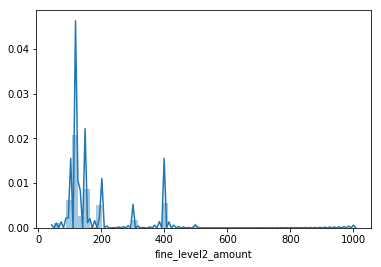

In [11]:
sns.distplot(df['fine_level2_amount'])

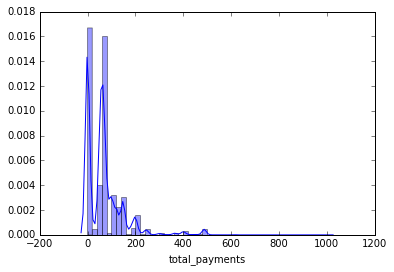

In [34]:
sns.distplot(df['total_payments'])

In [22]:
officer = df['officer'].value_counts()
officer

728      429
716      404
638      331
765      326
723      325
737      314
1385     296
790      282
690      281
800      279
1444     274
287      271
714      262
772      261
761      260
1374     256
641      256
735      256
746      253
102      250
776      231
1529     231
1491     228
789      223
1462     220
187      219
657      219
1457     217
754      214
797      214
        ... 
3373       1
5047       1
17929      1
13827      1
14337      1
17336      1
16782      1
16584      1
4113       1
6186       1
57442      1
12012      1
7227       1
4871       1
10189      1
15618      1
10480      1
18628      1
6595       1
T199       1
01002      1
18973      1
10257      1
19290      1
12804      1
2725       1
7527       1
12447      1
9886       1
18601      1
Name: officer, Length: 5779, dtype: int64

In [19]:
notice_lvl = df['notice_level'].unique()
notice_lvl

array([nan, 'SEIZ', 'VIOL', 'DETR', 'FINL', 'DLS'], dtype=object)

In [14]:
viol_code = df['violation_code'].unique()
viol_code

array(['0964190A', '0976160F', '0964130A', '0964100A', '0964125B',
       '0976160A', '0964090E', '0964040B', '0964150B', '0964190B',
       '0980130B', '0964080B', '0964050J', '0964020A', '0964100D',
       '0964170A', '0964110E', '0964100G', '0964100C', '0964110D',
       '0964080A', '0912060', '0976160D', '0964041', '0980110B',
       '0976140B', '0976150B', '0980110A', '0976210A', '0964140B',
       '0976050B', '0964120A', '0980080A', '0964070', '0964060',
       '0964020B', '0976050D', '0964110A', '0964100B', '0976050C',
       '0964170D', '0940060', '0976210B', '0964110G', '0964160B',
       '0964030B', '0976120', '0964110C', '0964130', '0976050E',
       '0976180B', '0980120B', '0976180A', '0964125D', '0940080',
       '0964125C', '0964100F', '0964120B', '0940220', '0964041B',
       '0964170B', '0964130B', '0964210', '0964091', '0964110F',
       '0964110B', '0976140A', '0964200B', '0976040A', '0940170',
       '0980120A', '0964110H', '0976160B', '0976090C', '0976160C',
       

In [10]:
viols = df['violation_description'].unique()
viols

array(['EXP. METER NON-CENTRAL BUSINESS DISTRICT',
       'EXPIRED PLATES OR TEMPORARY REGISTRATION', 'PARK ALLEY',
       "WITHIN 15' OF FIRE HYDRANT",
       'NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.',
       'REAR AND FRONT PLATE REQUIRED', 'RESIDENTIAL PERMIT PARKING',
       'STREET CLEANING', 'PARKING/STANDING PROHIBITED ANYTIME',
       'EXPIRED METER CENTRAL BUSINESS DISTRICT',
       'PARK IN CITY LOT WHEN CLOSED',
       'NO STANDING/PARKING TIME RESTRICTED', 'DISABLED PARKING ZONE',
       "WRONG DIRECTION OR 12'' FROM CURB", 'DISABLED CURB CUT',
       'TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET',
       'PARK OR STAND ON PARKWAY', 'STOP SIGN OR TRAFFIC SIGNAL',
       'BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE', 'PARK OR STAND ON SIDEWALK',
       'RUSH HOUR PARKING', 'STAND, PARK, OR OTHER USE OF BUS LANE',
       'NONCOMPLIANT PLATE(S)', 'SPECIAL EVENTS RESTRICTION',
       'HAZARDOUS DILAPIDATED VEHICLE',
       'EXCESS FUMES/SMOKE DURING OPERATION',
       'BURGLAR 

In [11]:
len(viols)

88

In [11]:
(2970733-2926441)/(2970733+2926441)

0.007510716149803279